In [2]:
# Listed below are all the libraries you 
# will need for this assignment. Run this
# code chunk everytime you open this file.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import pulp




In [3]:
# PARAMETERS
num_sims = 100
num_years = 20
num_days = 165

# FIXED PARAMETERS (Adjusted for real Alaska costs)
Perc_Work_Start = 0.5               # Require Tax Buildup of 50% cost to start project
P1_Est_Length = 3                   # Project requires X years for completion
Miles_To_Build = 22                 # Total miles of road needed
Cost_Per_Mile = 3000000             # Approx. $3M per mile (adjustable)
P1_Est_Cost = Miles_To_Build * Cost_Per_Mile  # Total Estimated Cost of Project
P1_Tax_Per_Pass = 0.10              # 0.10 Tax Per Cruise Passenger

# OUTPUT LISTS
Sim_Taxes_20_Years = []

# SIMULATIONS
for _ in range(num_sims):

    P1_Tax_Totals_Year = []
    P1_Tax_Avg_Year = []
    P1_Complete_Date = False

    for year in range(num_years):
        P1_Tax_Totals_Day = []

        # Start construction if enough tax is accumulated
        if sum(P1_Tax_Totals_Year) > (Perc_Work_Start * P1_Est_Cost):
            P1_Construct_Start = True
        else:
            P1_Construct_Start = False

        # Set project completion date
        if P1_Construct_Start and P1_Complete_Date == False:
            P1_Complete_Date = year + P1_Est_Length
        elif P1_Construct_Start and P1_Complete_Date != False:
            P1_Complete_Date = P1_Complete_Date
        else:
            P1_Complete_Date = False

        # Set project completed flag
        P1_Completed = (P1_Complete_Date != False) and (year > P1_Complete_Date)

        # Set if project is paid
        P1_Paid = sum(P1_Tax_Totals_Year) >= P1_Est_Cost

        P1_Tax_Fund = 0

        for days in range(num_days):
            Cruise_Passengers = np.random.normal(loc=10000, scale=5000 / 3)
            P1_New_Tax = max(Cruise_Passengers, 0) * P1_Tax_Per_Pass

            if not P1_Paid:
                P1_Tax_Fund += P1_New_Tax

            P1_Tax_Totals_Day.append(P1_Tax_Fund)

        P1_Tax_Avg_Year.append(P1_Tax_Totals_Day[-1] / len(P1_Tax_Totals_Day))
        P1_Tax_Totals_Year.append(P1_Tax_Totals_Day[-1])

    df_Year = pd.DataFrame({
        'Year': np.arange(1, num_years + 1),
        'Tax Total': P1_Tax_Totals_Year,
        'Tax Average': P1_Tax_Avg_Year,
    })

    Sim_Taxes_20_Years.append(sum(P1_Tax_Totals_Year))

df_Sim = pd.DataFrame({
    'Sim': np.arange(1, num_sims + 1),
    'Tax': Sim_Taxes_20_Years,
})

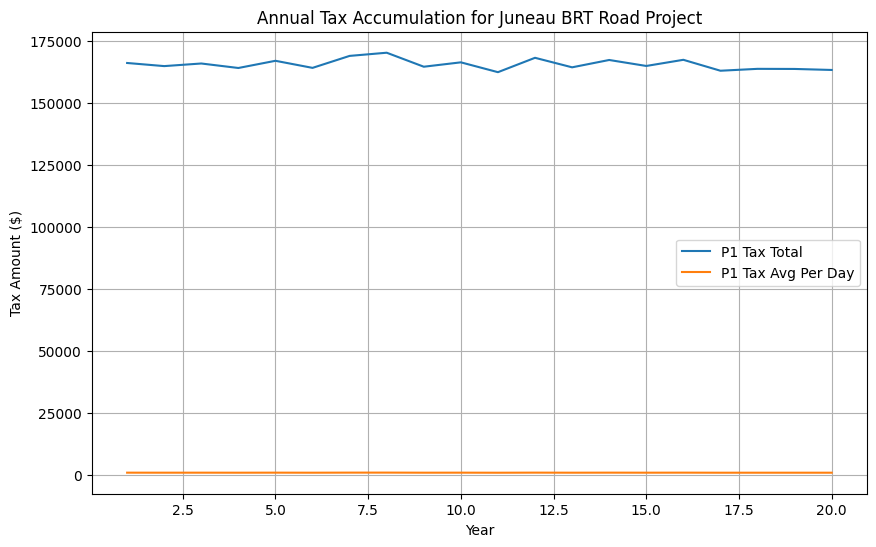

In [4]:
# PLOT 1 - YEARLY TAX TOTAL AND AVERAGE
plt.figure(figsize=(10, 6))
plt.plot(df_Year['Year'], df_Year['Tax Total'], label='P1 Tax Total')
plt.plot(df_Year['Year'], df_Year['Tax Average'], label='P1 Tax Avg Per Day')
plt.xlabel('Year')
plt.ylabel('Tax Amount ($)')
plt.title('Annual Tax Accumulation for Juneau BRT Road Project')
plt.legend()
plt.grid(True)
plt.show()





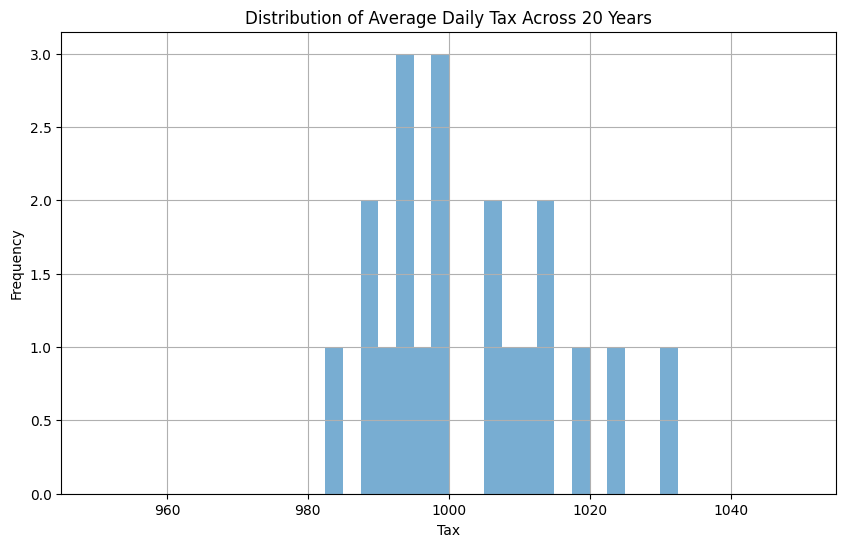

In [5]:
# PLOT 2 - HISTOGRAM OF AVERAGE DAILY TAX
plt.figure(figsize=(10, 6))
plt.hist(df_Year['Tax Average'], range=(950, 1050), bins=40, alpha=0.6)
plt.title('Distribution of Average Daily Tax Across 20 Years')
plt.xlabel('Tax')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

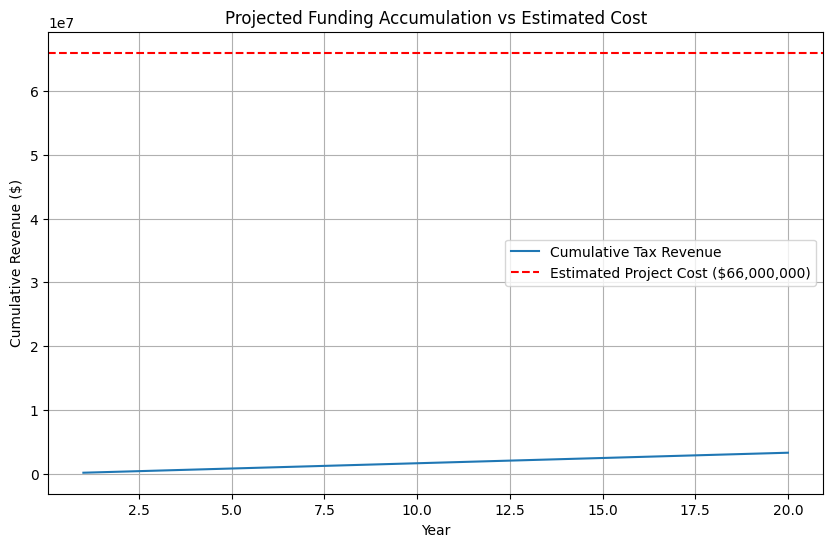

In [6]:
# PLOT 3 - CUMULATIVE FUNDING VS PROJECT COST
annual_tax_revenue = 10000 * P1_Tax_Per_Pass * num_days
cumulative_revenue = np.cumsum([annual_tax_revenue] * num_years)

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_years + 1), cumulative_revenue, label='Cumulative Tax Revenue')
plt.axhline(y=P1_Est_Cost, color='r', linestyle='--', label=f'Estimated Project Cost (${P1_Est_Cost:,.0f})')
plt.xlabel('Year')
plt.ylabel('Cumulative Revenue ($)')
plt.title('Projected Funding Accumulation vs Estimated Cost')
plt.legend()
plt.grid(True)
plt.show()


These graphs show the potential impact of the road project if it were completed — regardless of whether it's fully funded through current tax simulations.

To do this, we forced the project to be "completed" by Year 5 in the simulation. That means starting in Year 6, the new roads would be available for:

Cruise passenger BRT buses

Hotel and airport shuttles

Tourist buses

Local vehicle users who shift to BRT due to reduced congestion

daily_cars	22,000 vehicles/day	From Juneau DOT traffic counts near downtown (Egan Drive).
brt_reduction_percent	25%	Assumption based on similar BRT adoption rates in U.S. cities.
shuttle_bus_removal	2,000 vehicles/day	Estimated from tour, hotel, and airport buses that could use the corridor.
num_days	165	Cruise season length in Juneau.

annual_traffic_saved	1,237,500 vehicles	From Graph 4 calculation.
0.404 kg CO₂ per vehicle-mile	0.404 kg	EPA estimate for average gasoline car emissions per mile.


## Graph 4: Traffic Reduction (Assuming Completion in Year 5)

We estimated traffic relief by modeling how many vehicles would be removed annually if the BRT roads were completed. 

**Assumptions**:
- 25% of daily car users shift to BRT (based on studies from U.S. cities).
- Tourist, hotel, and airport shuttles (2,000/day) use the new roads.
- The cruise season is 165 days/year.

**Calculation**:


## Graph 5: Pollution Reduction (CO₂ Saved)

To estimate air quality improvements, we calculated how much CO₂ would be prevented annually.

**Assumption**:
- Each vehicle mile avoided prevents **0.404 kg of CO₂** (EPA estimate).

**Calculation**:

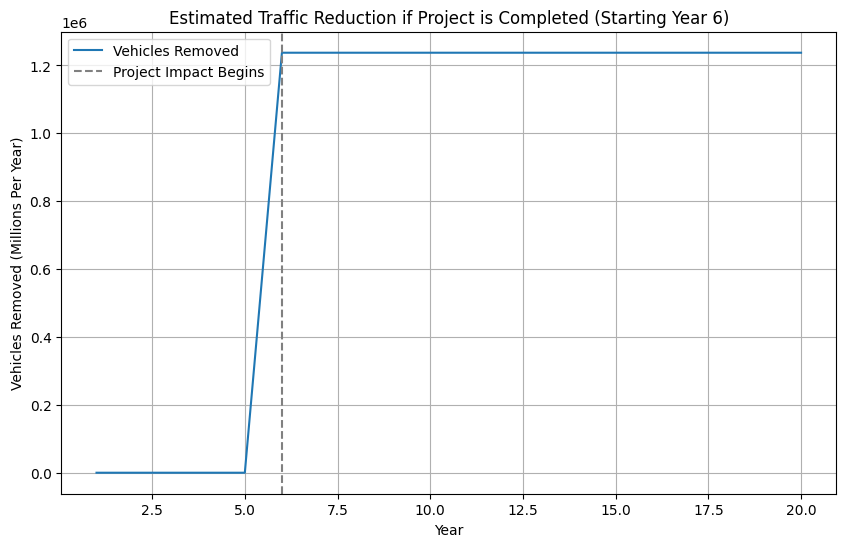

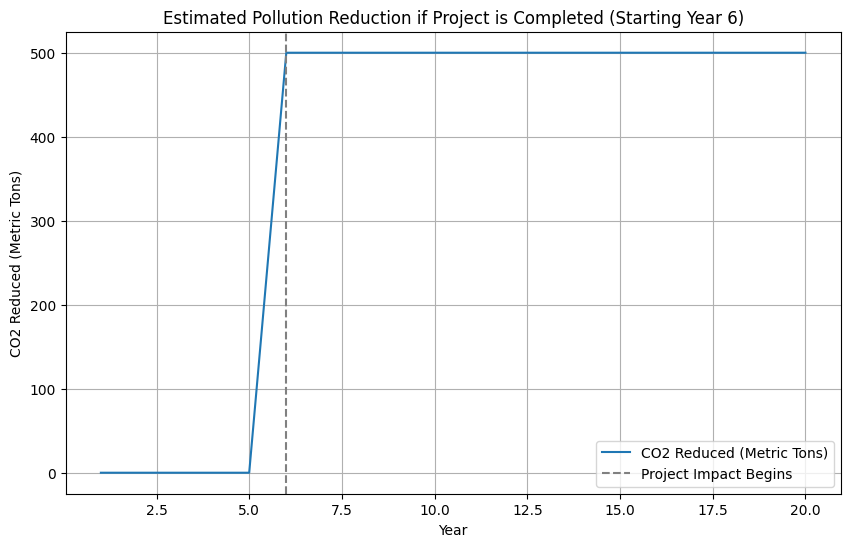

In [8]:
# TRAFFIC ESTIMATES (based on research)
daily_cars = 22000                     # Baseline vehicle volume per day
brt_reduction_percent = 0.25          # BRT shifts 25% of cars
shuttle_bus_removal = 2000            # Hotel + airport + tourist buses removed daily

# FORCED IMPACT LOGIC: Assume construction completes in Year 5
forced_impact_year = 5  # project completes by Year 5, impact begins Year 6

avg_traffic_removed_per_year = []
avg_pollution_saved_per_year = []

# SIMULATE YEARLY IMPACTS IF PROJECT IS COMPLETED
for year in range(1, num_years + 1):
    if year > forced_impact_year:
        daily_traffic_saved = daily_cars * brt_reduction_percent + shuttle_bus_removal
        annual_traffic_saved = daily_traffic_saved * num_days
        annual_pollution_saved = annual_traffic_saved * 0.404  # EPA kg CO2 per vehicle-mile
    else:
        annual_traffic_saved = 0
        annual_pollution_saved = 0

    avg_traffic_removed_per_year.append(annual_traffic_saved)
    avg_pollution_saved_per_year.append(annual_pollution_saved)

# Graph 4 PLOT TRAFFIC REDUCTION
years = np.arange(1, num_years + 1)
plt.figure(figsize=(10, 6))
plt.plot(years, avg_traffic_removed_per_year, label='Vehicles Removed')
plt.axvline(forced_impact_year + 1, linestyle='--', color='gray', label='Project Impact Begins')
plt.title('Estimated Traffic Reduction if Project is Completed (Starting Year 6)')
plt.xlabel('Year')
plt.ylabel('Vehicles Removed (Millions Per Year)')
plt.legend()
plt.grid(True)
plt.show()

# Graph 5 PLOT POLLUTION REDUCTION
plt.figure(figsize=(10, 6))
plt.plot(years, np.array(avg_pollution_saved_per_year) / 1000, label='CO2 Reduced (Metric Tons)')
plt.axvline(forced_impact_year + 1, linestyle='--', color='gray', label='Project Impact Begins')
plt.title('Estimated Pollution Reduction if Project is Completed (Starting Year 6)')
plt.xlabel('Year')
plt.ylabel('CO2 Reduced (Metric Tons)')
plt.legend()
plt.grid(True)
plt.show()